<a href="https://colab.research.google.com/github/coding-dojo-data-science/equations-review/blob/main/Statistical_Equations_%26_Evaluation_Metrics_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reviewing Statistical Equations - Evaluation Metrics


- 12/22/21
- Costa Rica Machine Learning Extension

In [ ]:
!pip install cdds  
from cdds.imports import *

cdds v0.1.2 loaded.


Package,Handle,Version,Documentation,Imported
pandas,pd,1.3.5,https://pandas.pydata.org/docs/,Y
cdds,ds,0.1.2,Coming Soon!,Y
numpy,np,1.21.6,https://numpy.org/doc/stable/reference/,Y
matplotlib,mpl,3.2.2,https://matplotlib.org/stable/api/index.html,Y
matplotlib.pyplot,plt,,https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot,Y
seaborn,sns,0.11.2,https://seaborn.pydata.org/api.html,Y
IPython.display,dp,,https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html,Y
sklearn,,1.0.2,,N


In [ ]:
## Figure Settings
plt.rcParams['figure.figsize']= (12,6)
sns.set_context('talk')
from sklearn import metrics

In [ ]:
## load in data and take subset 
df = ds.datasets.load_king_county_housing(project_vers=False)

df = df.sample(frac=0.04,random_state=42)
df = df.reset_index(drop=True)


X = df[['sqft_above','bedrooms','bathrooms','sqft_living']].copy()
y = df['price'].copy()

In [ ]:
y

0       365000.0
1       865000.0
2      1038000.0
3      1490000.0
4       711000.0
         ...    
860     459000.0
861     280000.0
862     859900.0
863    1320000.0
864     482000.0
Name: price, Length: 865, dtype: float64

# Measures of Central Tendency 


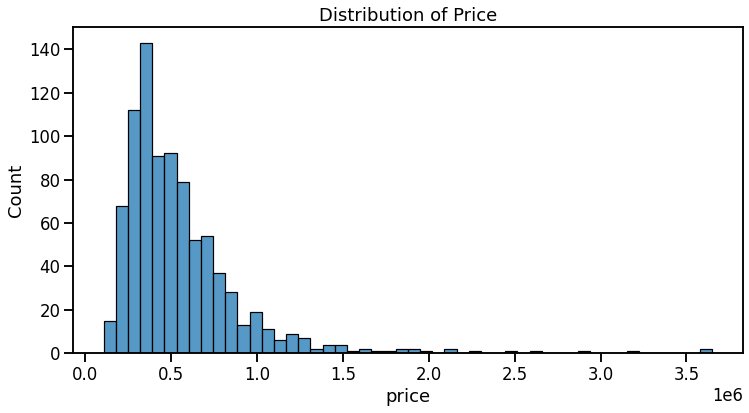

In [ ]:
## Distrubtion of MPG
ax = sns.histplot(y,bins='auto');
ax.set_title('Distribution of Price');

## Mean, Median, Mode


### Mean



The **Mean** or **Arithmetic Average** is the value obtained by dividing the sum of all the data by the total number of data points as shown in the formula below:

$$ 
\Large\bar X = \dfrac{\sum X}{N} $$


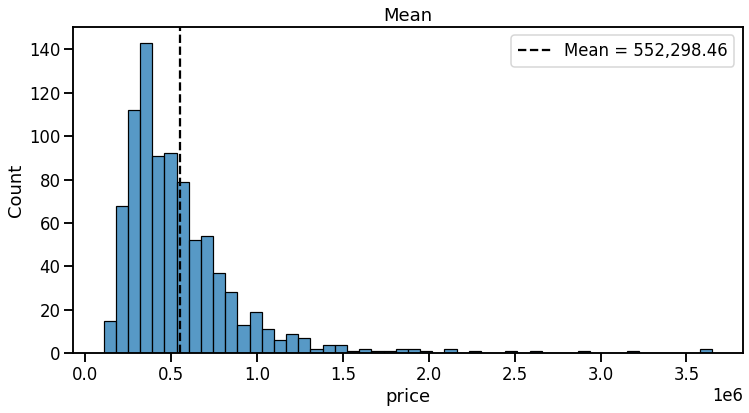

In [ ]:
## Distrubtion of MPG
ax = sns.histplot(y)
ax.axvline( y.mean(),label=f'Mean = {y.mean():,.2f}',
           ls='--',color='k')
ax.set_title('Mean')#,fontsize=18)
ax.legend();


### Median 



- The median is the middle-most value in a sorted list of values/observations.
    - If there are an even number of values, take the mean of the 2 middle values.


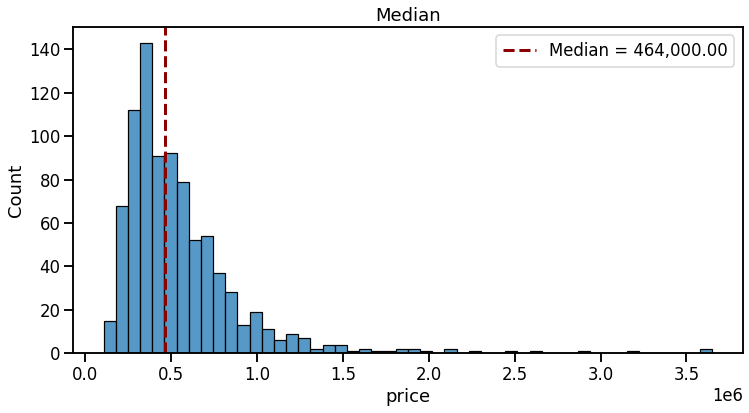

In [ ]:
## Distrubtion of MPG
ax = sns.histplot(y)#,bins='auto');
ax.axvline( y.median(),label=f'Median = {y.median():,.2f}',
           ls='--',color='darkred',lw=3)
ax.set_title("Median")#fontsize=18)
ax.legend();

### Comparing Mean vs Median

- Mean/Average is used most commonly in the general public. 
- However, the mean is easily influenced by outliers. 
>- The median is robust against outliers and is a better measure of centrality.

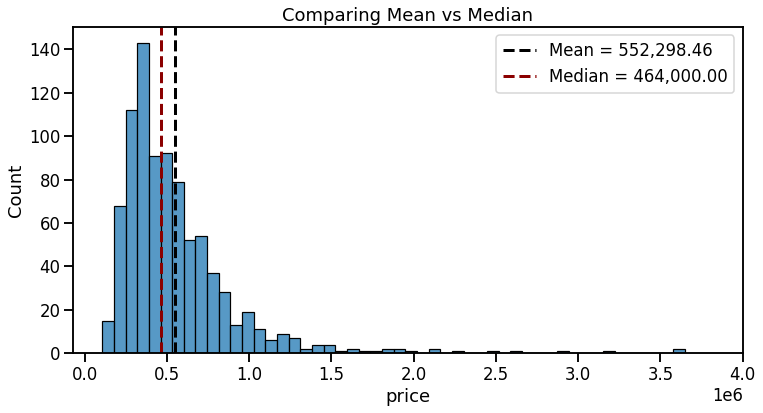

In [ ]:
## Distrubtion of MPG
ax = sns.histplot(y)#,bins='auto');
ax.axvline( y.mean(),label=f'Mean = {y.mean():,.2f}',
           ls='--',color='k',lw=3)
ax.axvline( y.median(),label=f'Median = {y.median():,.2f}',
           ls='--',color='darkred',lw=3)
ax.set_title('Comparing Mean vs Median',fontsize=18)

## Zooming in for comparison
ax.set_xlim(right=4e6)
ax.legend();


### Mode



- The mode is the value that occurs the most
    - highest frequency/most common
    
  

In [ ]:
y.mode()

0    250000.0
dtype: float64

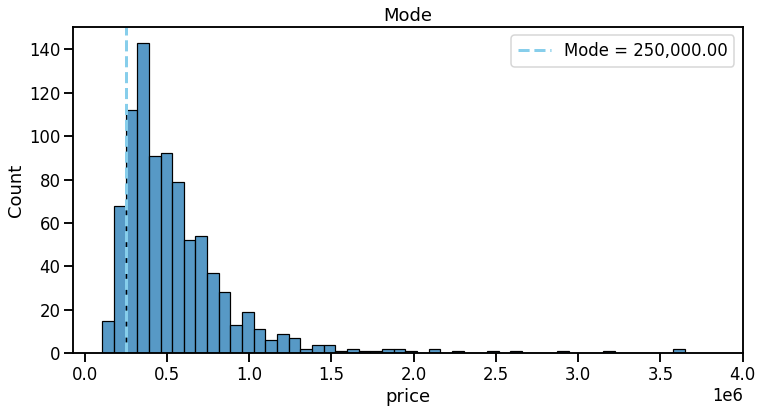

In [ ]:
## Distrubtion of MPG
ax = sns.histplot(y)#bins='auto');
ax.axvline(y.mode()[0],label=f'Mode = {y.mode()[0]:,.2f}',
           ls='--',color='skyblue',lw=3)
ax.set_title('Mode')#,fontsize=18)
## Zooming in for comparison
ax.set_xlim(right=4e6)
ax.legend();

## Comparing Measures of Central Tendancy

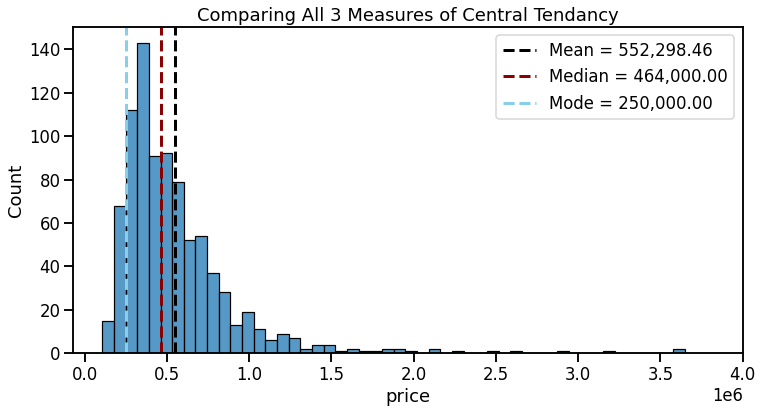

In [ ]:
## Distrubtion of MPG
ax = sns.histplot(y);
ax.axvline( y.mean(),label=f'Mean = {y.mean():,.2f}',
           ls='--',color='k',lw=3)
ax.axvline( y.median(),label=f'Median = {y.median():,.2f}',
           ls='--',color='darkred',lw=3)
ax.axvline(y.mode()[0],label=f'Mode = {y.mode()[0]:,.2f}',
           ls='--',color='skyblue',lw=3)
ax.set_title('Comparing All 3 Measures of Central Tendancy',fontsize=18)
ax.legend();

ax.set_xlim(right=4e6);

# Measures of Dispersion


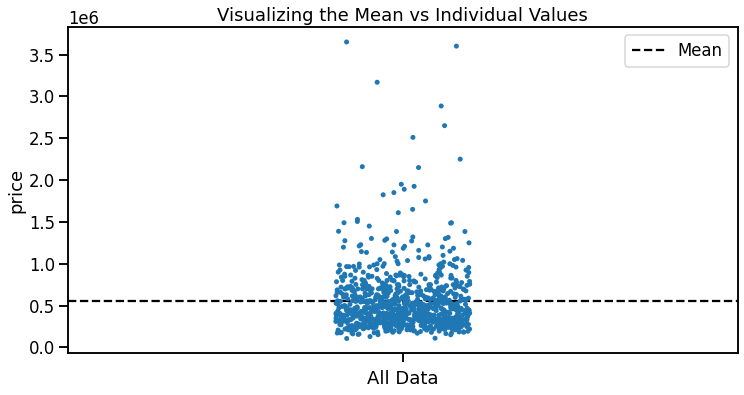

In [ ]:
## Plot all values for price vs the mean
ax = sns.stripplot(data=df,y='price')
ax.axhline( df['price'].mean(),color='k',ls='--',label="Mean");
ax.set(xlabel="All Data",title='Visualizing the Mean vs Individual Values')
ax.legend();

> Measures that describe how spread out the values are compared to their central value.

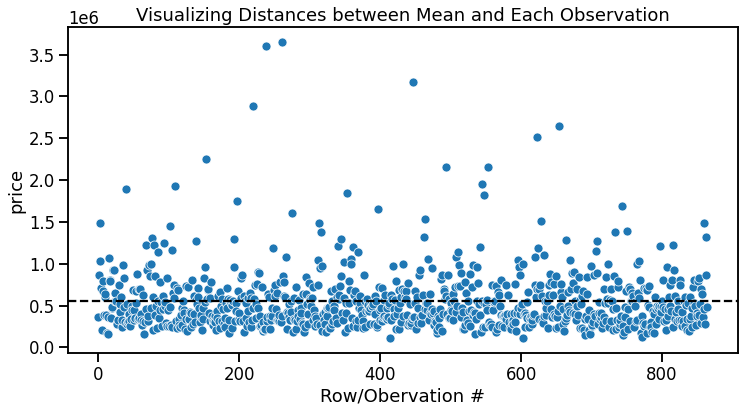

In [ ]:
### SPREADING OUT THE X-AXIS FOR EASIER VISUALIZATION
## Plot row # as x and the the price values as y
ax = sns.scatterplot(data=df, y='price',x=df.index)


## Add a horizontal line for the mean
ax.axhline( df['price'].mean(),color='k',ls='--',label="Mean");
ax.set(xlabel='Row/Obervation #',
       title='Visualizing Distances between Mean and Each Observation');

>- Errors/Residuals = the difference between each observation ($X_{i}$) and the expected value ($\hat{X}$).
    - $$ Error =  X_{i} - \hat{X} $$

>- For basic statistics, our expected value is the mean. ($\hat{y}$ == $\bar{y}$), so our definition for Error becomes:

$$ Error =  X_{i} - \bar{X} $$

In [ ]:
## Error is the difference between each value (y) and our "prediction" (the mean)
errors = y - y.mean()
errors.name = 'Residuals/Errors'
errors

0     -187298.456647
1      312701.543353
2      485701.543353
3      937701.543353
4      158701.543353
           ...      
860    -93298.456647
861   -272298.456647
862    307601.543353
863    767701.543353
864    -70298.456647
Name: Residuals/Errors, Length: 865, dtype: float64

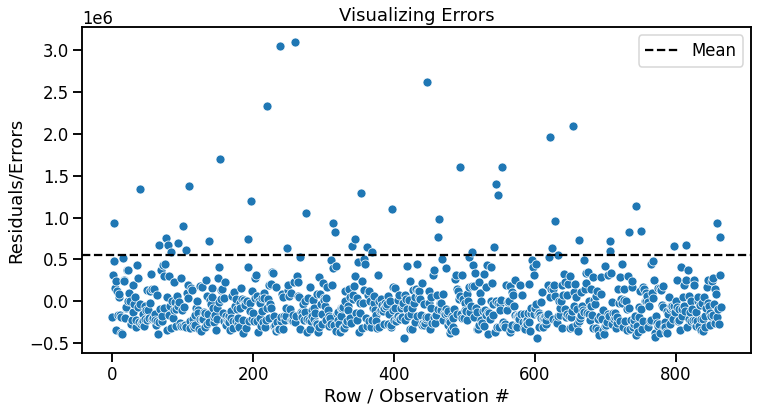

In [ ]:
ax = sns.scatterplot(y=errors,x=errors.index,)
ax.axhline( df['price'].mean(),color='k',ls='--',label="Mean");
ax.set(xlabel='Row / Observation #',
       title='Visualizing Errors');
ax.legend();

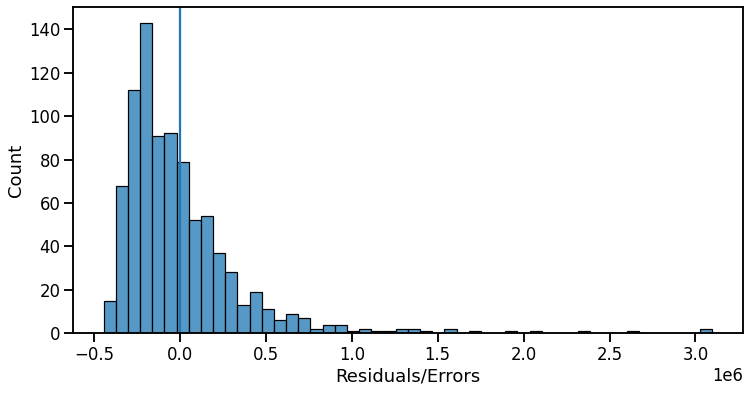

In [ ]:
ax = sns.histplot(errors)
ax.axvline(0)


### Absolute Deviation/Error



**Absolute Deviation** is the simplest way of calculating the dispersion of a data set. It is calculated by taking a value from the dataset and subtracting the mean of the dataset. This helps to identify the "distance" between a given value and the mean. In other words, how much a value *deviates* from the mean.  

> $\left|x_i - \bar{x}\right|$


In [ ]:
## Error is the difference between each value (y) and our "prediction" (the mean)
abs_deviation = np.abs(y - y.mean())
abs_deviation.name ="Absolute Deviation"
abs_deviation

0      187298.456647
1      312701.543353
2      485701.543353
3      937701.543353
4      158701.543353
           ...      
860     93298.456647
861    272298.456647
862    307601.543353
863    767701.543353
864     70298.456647
Name: Absolute Deviation, Length: 865, dtype: float64

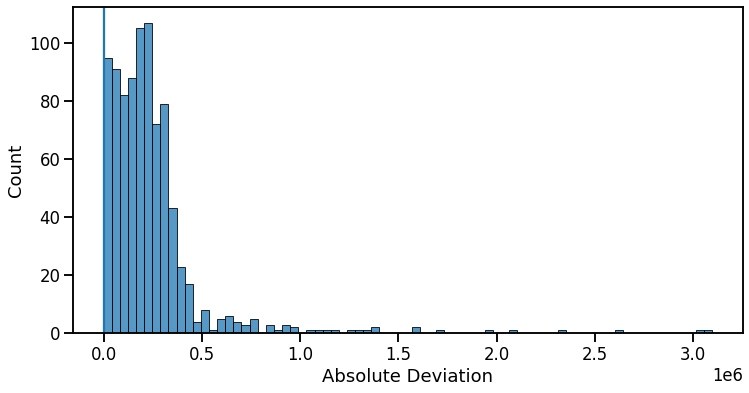

In [ ]:
ax = sns.histplot(abs_deviation)
ax.axvline(0)


**Average Absolute Deviation** is calculated by taking the mean of all individual absolute deviations in a data set as shown in the formula below:

<!-- $$\large \dfrac{1}{n}\sum^n_{i=1}\left|(x_i-\bar x)\right| $$ -->

$$\large \text{Average Absolute Deviation}= \dfrac{ \sum^n_{i=1}|x_i-\bar x|}{n} $$




In [ ]:
## calc average abs_deviaton
aad = np.sum(abs_deviation)/len(abs_deviation)
aad

241726.4528851616

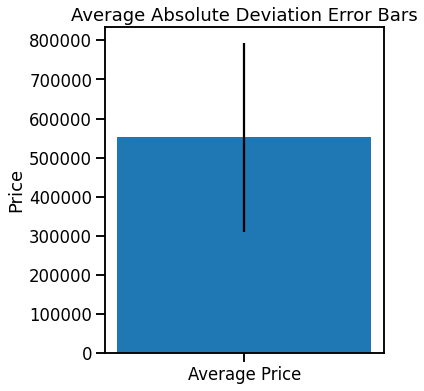

In [ ]:
## PLot average price with aad as error bar
fig, ax = plt.subplots(figsize=(5 ,6))
ax.bar("Average Price",y.mean(),yerr=aad)
ax.set(ylabel='Price',title='Average Absolute Deviation Error Bars');

#### Visualizing AAD

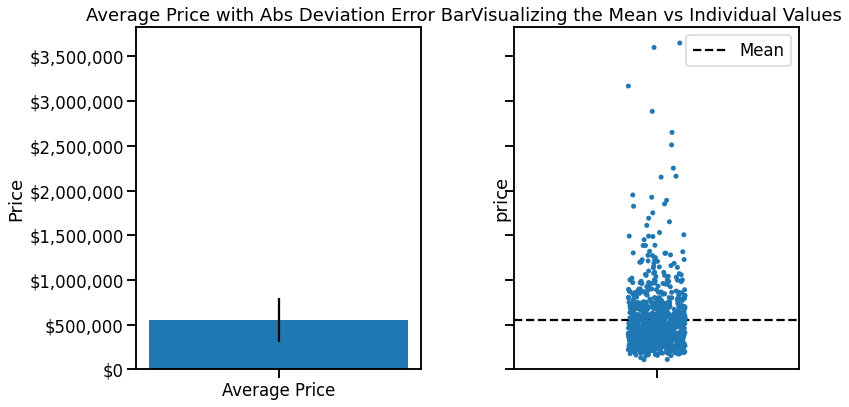

In [ ]:
## Comparing AAD vs original plot
from matplotlib.ticker import StrMethodFormatter
formatter = StrMethodFormatter("${x:,.0f}")

fig,axes= plt.subplots(figsize=(12,6),ncols=2,sharey=True)

## Plot mean with AAD error bar
axes[0].bar("Average Price",y.mean(),yerr=aad)
axes[0].set(ylabel='Price',title='Average Price with Abs Deviation Error Bar');


## Plot all values for price vs the mean
sns.stripplot(data=df,y='price',ax=axes[1])
axes[1].axhline( df['price'].mean(),color='k',ls='--',label="Mean");
axes[1].set_title('Visualizing the Mean vs Individual Values')
axes[1].legend();

axes[0].yaxis.set_major_formatter(formatter)
# axes[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()

### Variance



Earlier in the course, you learned about __variance__ (represented by $\sigma^2$) as a measure of dispersion for continuous random variables from its expected mean value. Let's quickly revisit this, as variance formula plays a key role while calculating covariance and correlation measures.

The formula for calculating variance as shown below:

$$\Large \text{Variance} = \sigma^2 = \dfrac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}$$

- $x$ represents an individual data points
- $\mu $ is the mean of the data points
- $n$ is the total number of data points 



In [ ]:
## Calculate variance manually
variance = np.sum( (y - y.mean())**2 ) / len(y)
variance

138385013377.20535

In [ ]:
## Calculate variance with numpy

np.var(y)

138385013377.20535


## Standard Deviation



The **Standard Deviation** is another measure of the spread of values within a dataset. 
It is simply the square root of the variance. In the above formula, $\sigma^2$ is the variance so $\sigma$ is the standard deviation. 
<!-- 
$$ \large \sigma = \sqrt{\dfrac{1}{n}\displaystyle\sum^n_{i=1}(x_i-\mu)^2} $$ -->

$$\large \text{Standard Deviation} =  \sigma = \sqrt{\dfrac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}}$$



In [ ]:
## Calculate standard deviation manually
std = np.sqrt(variance)
std

372001.36206364265

In [ ]:
## Calculate standard deviation with numpy
np.std(y)

372001.36206364265

In [ ]:
# ## Comparing AAD vs original plot
# from matplotlib.ticker import StrMethodFormatter
# formatter = StrMethodFormatter("${x:,.0f}")

# fig,axes= plt.subplots(figsize=(12,6),ncols=2,sharey=True)

# ## Plot mean with AAD error bar
# axes[0].bar("Average Price",y.mean(),yerr=std)
# axes[0].set(ylabel='Price',title='Average Price with Standard Deviation Error Bar');


# ## Plot all values for price vs the mean
# sns.stripplot(data=df,y='price',ax=axes[1])
# axes[1].axhline( df['price'].mean(),color='k',ls='--',label="Mean");
# axes[1].set_title('Visualizing the Mean vs Individual Values')
# axes[1].legend();

# axes[0].yaxis.set_major_formatter(formatter)
# # axes[1].yaxis.set_major_formatter(formatter)

# plt.tight_layout()

# 📈 Evaluation Metrics - Regression

## Fitting a LinearRegression

> Build a model to predict price using sqft above

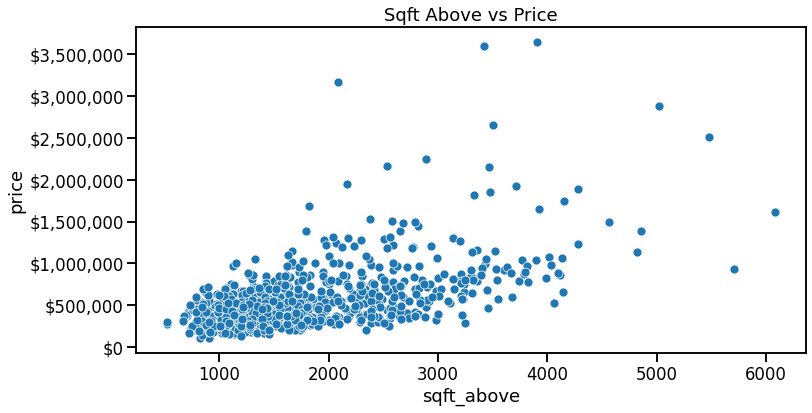

In [ ]:
## Visualize data for model
ax = sns.scatterplot(data=df, x="sqft_above",y='price')
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Sqft Above vs Price');

In [ ]:
from sklearn.linear_model import LinearRegression
X_model = X[['sqft_above']]

In [ ]:
## Fit a linear regression and get the predictions (y_hat)
linreg = LinearRegression()
linreg.fit(X_model,y)

## Get predictions
y_hat = linreg.predict(X_model)

#### Visualizing Model's Predicted Values vs Actual Values

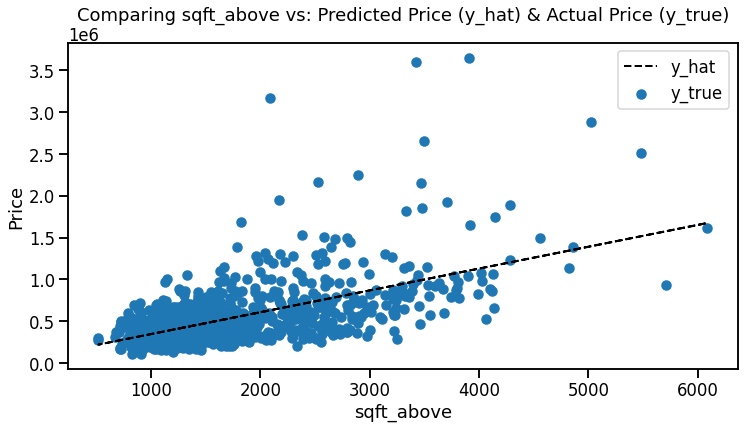

In [ ]:
## plot the model; predictions vs X_model
plt.plot(X_model['sqft_above'],y_hat,color='k',ls='--',lw=2,label='y_hat')
plt.scatter(X_model['sqft_above'],y, label='y_true')
plt.ylabel('Price')
plt.xlabel('sqft_above')
plt.legend();
plt.title('Comparing sqft_above vs: Predicted Price (y_hat) & Actual Price (y_true)',y=1.05);


## Mean Absolute Error (MAE)

$$ \Large MAE = \frac{\sum_{i=1}^{n}|y_{i} - \hat y_{i}|}{n}$$
- To prevent a + error and - error from cancelling each other out, we take the absolute value of the erorrs before we sum them.

- MAE will still be in the same units as the original target.
- On average, how off is your model's prediction from the true value?



In [ ]:
# Calculate MAE manually
mae = np.sum(np.abs(y - y_hat))/len(y)
mae

198718.45270280013

In [ ]:
# Calculate MAE with sklearn
mae = metrics.mean_absolute_error(y,y_hat)
mae

198718.45270280013


## Mean Squared Error (MSE)



- To prevent a + error and - error from cancelling each other out, we could also square the erorr (since a negative number squared becomes a positive number).

$$ \Large MSE = \frac{\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}{n}$$


- Statisticians like MSE over MAE because it punishes larger errors more severely, we can square $y_{i} - \hat y_{i} $ instead of taking the absolute value.

- Unlike MAE, MSE is no longer in the same units as the data, it is in units-squared. 



In [ ]:
# Calculate MSE manually
mse = np.sum((y - y_hat)**2)/len(y)
mse

92894642185.29494

In [ ]:
## Calculate MSE with sklearn
mse = metrics.mean_squared_error(y,y_hat)
mse

92894642185.29494

## Root-Mean Squared Error (RMSE)


- To convert MSE back to the same units as the original taret, we can take the square-root of the MSE to get RMSE.

$$ \Large RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}{n}}$$

>- RMSE is probably the best/most-useful metric out of MAE, MSE, and RMSE.






In [ ]:
# Calculate RMSE manually
rmse = np.sqrt(mse)
rmse

304786.22374591493

In [ ]:
rmse = metrics.mean_squared_error(y,y_hat,squared=False)
rmse

304786.22374591493


## R-Squared



> **The $R^2$ or Coefficient of determination is a statistical measure that is used to assess the goodness of fit of a regression model**

>- Value should be between 0 and 1.
    - $R^2$ is the proportion (%) of the variance in our target that our model could explain.
    - $R^2$=0.8 means our model can explain 80% of the variance in our target.
    - If we have a REALLY BAD model, we may get a negative $R^2$



- The **Sum of Squared Errors (SSE)** for our Models **Predicted Values ($\hat{y}$) vs the true values ($y_i$)**: 
$$\text{SSE of our Predictions } = \sum_i(y_i - \hat y_i)^2$$

- The **SSE if we use the Mean as Our Prediction ($\bar{y}$) vs the true values  ($y_i$)**

 $$\text{SSE of the Mean } = \sum_i(y_i - \overline y_i)^2$$


- $R^2$ (R-Square) calculates how much better our model's predictions are vs if we just used the mean instead. 


$$ \large R^2 = 1 - \dfrac{\text{SSE of our Predictions}}{ \text{SSE of the Mean }}  $$


<br>

$$ \large R^2  = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$



In [ ]:
## calc r_squared manually
numerator = np.sum( (y-y_hat)**2)
denomenator = np.sum( (y-y.mean())**2)

r_squared = 1 - numerator/denomenator
r_squared

0.32872324886737736

In [ ]:
## calc r_squared with sklearn
r_squared = metrics.r2_score(y,y_hat)
r_squared

0.32872324886737736

___

# 📊 Evaluation Metrics - Classification

> [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)

- **Classification Metrics are based on the confusion matrices of our model**


In [ ]:
from sklearn import metrics
import seaborn as sns
## Making example classification target
y_true = [1,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0]
y_hat = [1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0]


## Calculate the confusion matrix from the true and predicted values
cm = metrics.confusion_matrix(y_true,y_hat)
cm

array([[7, 2],
       [3, 6]])

Text(1.5, 1.5, 'TP')

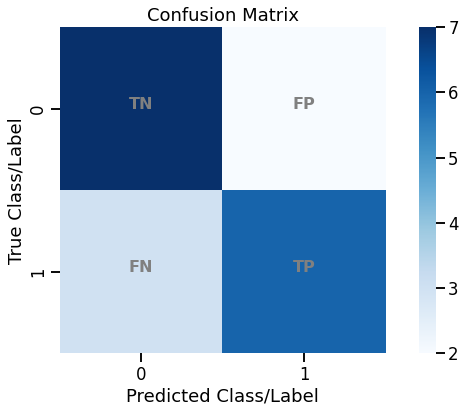

In [ ]:
## Plot heatmap
ax = sns.heatmap(cm, annot=False,square=True, cmap='Blues')
ax.set(ylabel='True Class/Label',xlabel='Predicted Class/Label',
       title='Confusion Matrix');

## Annotate TP/TN,etc
font_kws = dict (fontweight='bold',fontsize=16,
                 ha='center',color='gray')
ax.annotate("TN",(0.5,0.5), **font_kws)
ax.annotate("FP",(1.5,0.5),**font_kws)
ax.annotate("FN",(0.5,1.5), **font_kws)
ax.annotate("TP",(1.5,1.5),**font_kws)#,color='white')



- A confusion matrix shows the true labels/classes on the y axis and the predicted classes on the x axis.
    - If the model predicts that the class=1 and it truly is 1, then that is a "True Positiive (TP)"
    - If the model predicts that the class=0 and it truly is 0, then that is a "True Negative (TN)"
    - If the model predicts that the class=1 BUT the true class is 0, then that is a "False Positive (FP)"
    - If the model predicts that the class=0 BUT the true class is 1, then that is a "False Negative (FN)"

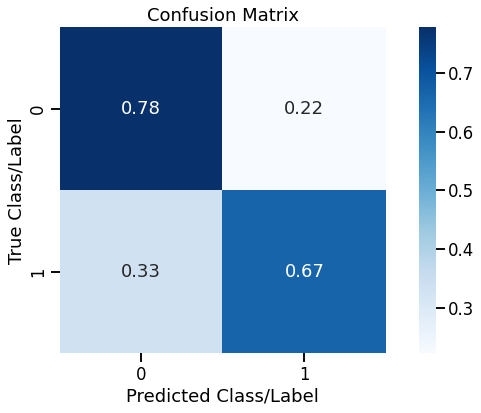

In [ ]:
## Calculate the confusion matrix from the true and predicted values
cm_norm = metrics.confusion_matrix(y_true,y_hat,normalize='true')
ax = sns.heatmap(cm_norm, annot=True,square=True, cmap='Blues')
ax.set(ylabel='True Class/Label',xlabel='Predicted Class/Label',
       title='Confusion Matrix');

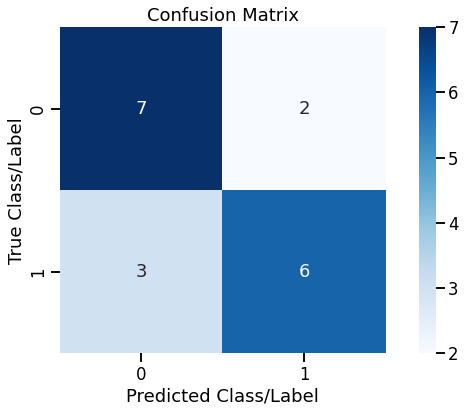

In [ ]:
## Visualize the confusion matrix

ax = sns.heatmap(cm, annot=True,square=True, cmap='Blues')
ax.set(ylabel='True Class/Label',xlabel='Predicted Class/Label',
       title='Confusion Matrix');
       

In [ ]:
## SLice out TN/FP/etc from cm
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

## Make sure we got the order right
print(TN,FP)
print(FN,TP)

7 2
3 6


### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}  $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [ ]:
## calcualte accuracy manually
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.7222222222222222

In [ ]:
## compare against the accuracy_score
metrics.accuracy_score(y_true,y_hat)

0.7222222222222222

### Precision

> "**_Precision_** measures what proportion of predicted Positives is truly Positive?


$$ \large \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$


#### When to use?
- **Use precision** when the cost of acting is high and acting on a positive is costly.
   - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

In [ ]:
metrics.precision_score(y_true, y_hat)

0.75

In [ ]:
prec = TP/(FP+TP)
prec

0.75

### Recall (AKA Sensitivity)

> **_Recall_** indicates what percentage of the classes we're interested in were actually captured by the model."
$$ \large \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 


#### When to use?
- **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
    - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)

In [ ]:
metrics.recall_score(y_true, y_hat)

0.6666666666666666

In [ ]:
rec = TP /(TP+FN)
rec

0.6666666666666666

#### Sensitivity vs Specificity
- Sensitivity(True Positive rate) measures the proportion of positives that are correctly identified
- Specificity (True Negative rate) measures the proportion of negatives that are correctly identified


> Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

In [ ]:
print(metrics.classification_report(y_true,y_hat))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.75      0.67      0.71         9

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18



In [ ]:
## for binary classification, can get Specifity from 0 class's recall.
report = metrics.classification_report(y_true,y_hat,output_dict=True)

sensitivty = report['1']['recall']
specificity = report['0']['recall']
print(f"Sensitivity = {sensitivty:.2f}")
print(f"Specificity = {specificity:.2f}")

Sensitivity = 0.67
Specificity = 0.78


### $F_1$ Score

F1 score represents the **_Harmonic Mean of Precision and Recall_**.  In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. 

> Harmonic Mean: "the reciprocal of the arithmetic mean of the reciprocals of a given set of observatins." - *[Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)*

#### Arithmetic Mean:

$$\large \bar{X} = \frac{a+b+c}{n} $$

#### Harmonic Mean:

$$ \large \bar{X} = \frac{n}{\frac{1}{a}+ \frac{1}{b}+ \frac{1}{c}}$$


**The formula for F1 score is:**

> $$ \text{F1 score} =  \frac{2}{\text{Precision}^{-1}\ x\ \text{Recall}^{-1}}= 2\ \frac{\text{Precision}\ x\ \text{Recall}}{\text{Precision} + \text{Recall}} $$

#### When to use?
- **F1 score** is really the most informative about overall model quality.
- BUT is the most difficult to express to a non-tech audience

In [ ]:
f1_score = 2*prec*rec / (prec + rec)
print(f1_score)

0.7058823529411765


In [ ]:
metrics.f1_score(y_true,y_hat)

0.7058823529411765

## Which classification metric to use?

- **When in doubt, use them all!** 
    - `metrics.classification_report`
 

In [ ]:
print(metrics.classification_report(y_true,y_hat))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.75      0.67      0.71         9

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18



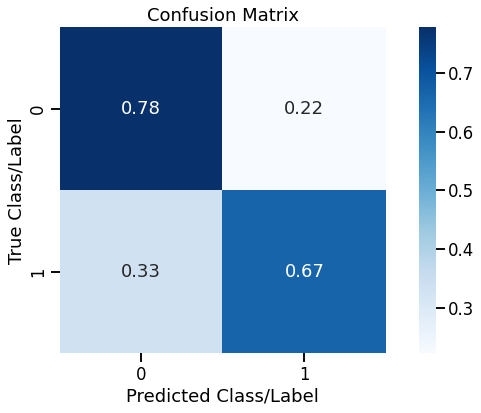

In [ ]:
## Calculate the confusion matrix from the true and predicted values
cm_norm = metrics.confusion_matrix(y_true,y_hat,normalize='true')
ax = sns.heatmap(cm_norm, annot=True,square=True, cmap='Blues')
ax.set(ylabel='True Class/Label',xlabel='Predicted Class/Label',
       title='Confusion Matrix');

- **But some good rules of thumb:**
    - **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)
    
    - **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
        - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)
    - **Use precision** when the cost of acting is high and acting on a positive is costly.
       - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

- **F1 score** is really the most informative about overall model quality, but is the most difficult to express to a non-tech audience

# APPENDIX


## Measures of Mututal Variation



### Calculating Covariance



If you have $X$ and $Y$, two random variables having $n$ elements each. You can calculate covariance ($\sigma_{xy}$) between these two variables by using the formula:

$$ \Large \sigma_{XY} = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)$$

- $\sigma_{XY}$ = Covariance between $X$ and $Y$
- $x_i$ = ith element of variable $X$
- $y_i$ = ith element of variable $Y$
- $n$ = number of data points (__$n$ must be same for $X$ and $Y$__)
- $\mu_x$ = mean of the independent variable $X$
- $\mu_y$ = mean of the dependent variable $Y$



#### Interpreting covariance values 



Covariance values range from positive infinity to negative infinity. 

* A **positive covariance** indicates that two variables are **positively related**

* A **negative covariance** indicates that two variables are **inversely related**

* A **covariance equal or close to 0** indicates that there is **no linear relationship** between two variables







### Calculating Correlation Coefficient



Pearson Correlation ($r$) is calculated using following formula :

$$ \Large r = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)} {\sqrt{\sum_{i=1}^{n}(x_i - \mu_x)^2 \sum_{i=1}^{n}(y_i-\mu_y)^2}}$$

So just like in the case of covariance,  $X$ and $Y$ are two random variables having n elements each. 


- $x_i$ = ith element of variable $X$
- $y_i$ = ith element of variable $Y$
- $n$ = number of data points (__$n$ must be same for $X$ and $Y$__)
- $\mu_x$ = mean of the independent variable $X$
- $\mu_y$ = mean of the dependent variable $Y$
- $r$ = Calculated Pearson Correlation


<!-- 
Here is how it works. 

R-Squared uses a so-called "baseline" model which is a very simple, naive model. This baseline model does not make use of any independent variables to predict the value of dependent variable Y. Instead, it uses the **mean** of the observed responses of the dependent variable $y$ and always predicts this mean as the value of $y$ for any value of $x$. In the image below, this model is given by the straight orange line.


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-coefficient-of-determination-online-ds-ft-100719/master/images/linreg_rsq.png" width="400">

You can see that, in this plot, the baseline model always predicts the mean of $y$ **irrespective** of the value of the $x$. The red line, however, is our fitted regression line which makes use of $x$ values to predict the values of $y$. Looking at the plot above, R-Squared simply asks the question:

>** Is our fitted regression line better than our baseline (worst) model ?**

Any regression model that we fit is compared to this baseline model to understand its **goodness of fit**. Simply put, R-Squared just explains how good is your model when compared to the baseline model. That's about it.  -->
